# WNBA Salary Exploratory Analysis

Team and player salaries are crucial to the game of basketball. Due to the hard salary cap, the degree to which a team can spend money and remain flexible dictates roster construction and management. Additionally, with the new CBA in the WNBA, historical trends in player and team salary can be examined.

The following explores the `TeamSalaries` classes of the [py_ball](https://github.com/basketballrelativity/py_ball) package by exploring the data available on the [Spotrac.com](https://spotrac.com). The goal of this analysis is to explore the salary data available.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from py_ball import wnba_salaries

ID_TO_TEAM_WNBA = {'1611661330': 'Dream', '1611661321': 'Wings',
                   '1611661320': 'Sparks', '1611661317': 'Mercury',
                   '1611661329': 'Sky', '1611661325': 'Fever',
                   '1611661324': 'Lynx', '1611661328': 'Storm',
                   '1611661323': 'Sun', '1611661319': 'Aces',
                   '1611661313': 'Liberty', '1611661322': 'Mystics'}

Let's checkout the `TeamSalaries` class. We'll need to provide a season for which to pull salary information, so let's start with the current season.

## Team Salaries (Current)

In [2]:
season = 2020
team_salaries = wnba_salaries.TeamSalaries(season)

In [3]:
team_df = pd.DataFrame(team_salaries.totals).T
team_df.columns = team_salaries.totals_columns

In [4]:
team_df['team'] = [ID_TO_TEAM_WNBA[x] for x in team_df.index.values]

In [5]:
team_df.head()

,Rank,Team,Signed,Average Age,Active Cap,Dead Cap,Total Cap,Cap Space,URL,team
1611661324,1,Minnesota Lynx,10,26.6,"$737,627",0,"$737,627","$562,373",https://www.spotrac.com/redirect/team/347/cap-...,Lynx
1611661319,2,Las Vegas Aces,10,25.8,"$788,000",0,"$788,000","$512,000",https://www.spotrac.com/redirect/team/345/cap-...,Aces
1611661313,3,New York Liberty,9,25.4,"$870,200",0,"$870,200","$429,800",https://www.spotrac.com/redirect/team/348/cap-...,Liberty
1611661329,4,Chicago Sky,9,26.1,"$872,206",0,"$872,206","$427,794",https://www.spotrac.com/redirect/team/341/cap-...,Sky
1611661320,5,Los Angeles Sparks,11,28.2,"$993,000",0,"$993,000","$307,000",https://www.spotrac.com/redirect/team/346/cap-...,Sparks


The table above shows yearly salary breakdowns for the 2020 WNBA season by team, along with the data source URL. Going into the offseason, financial flexibility allows for the pursuit of free agents. To visualize this, let's compare the team salary from the 2019 season to the salary on the books already for the 2020 season.

In [6]:
prior_season = 2019
prior_team_salaries = wnba_salaries.TeamSalaries(prior_season)

prior_team_df = pd.DataFrame(prior_team_salaries.totals).T
prior_team_df.columns = prior_team_salaries.totals_columns
prior_team_df['team'] = [ID_TO_TEAM_WNBA[x] for x in prior_team_df.index.values]
prior_team_df.head()

,Rank,Team,Signed,Average Age,Active Cap,Dead Cap,Total Cap,Cap Space,URL,team
1611661321,1,Dallas Wings,12,24.0,"$750,280",0,"$750,280","$245,820",https://www.spotrac.com/redirect/team/343/cap-...,Wings
1611661325,2,Indiana Fever,12,24.9,"$812,033",0,"$812,033","$184,067",https://www.spotrac.com/redirect/team/344/cap-...,Fever
1611661319,3,Las Vegas Aces,12,25.6,"$841,017",0,"$841,017","$155,083",https://www.spotrac.com/redirect/team/345/cap-...,Aces
1611661330,4,Atlanta Dream,12,26.2,"$832,176",0,"$868,543","$127,557",https://www.spotrac.com/redirect/team/340/cap-...,Dream
1611661313,5,New York Liberty,12,25.4,"$848,635",0,"$872,647","$123,453",https://www.spotrac.com/redirect/team/348/cap-...,Liberty


In [7]:
def compare_seasons(team_df, prior_team_df):
    """ compare_seasons plots a paired barchart comparing
    the team salaries from two consecutive seasons
    """
    team_df['Total Cap'] = [int(x.replace('$', '').replace(',', '')) for x in team_df['Total Cap']]
    prior_team_df['Total Cap'] = [int(x.replace('$', '').replace(',', '')) for x in prior_team_df['Total Cap']]
    team_df = team_df.merge(prior_team_df[['Total Cap']],
                            left_index=True,
                            right_index=True)
    team_df = team_df.sort_values('Total Cap_x', ascending=False)
    season_1_vals = [x for x in team_df['Total Cap_y']]
    season_2_vals = [x for x in team_df['Total Cap_x']]

    ind = np.arange(12)  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(14, 9))
    rects1 = ax.bar(ind - width/2, season_1_vals, width,
                    color='gray', label='2019')
    rects2 = ax.bar(ind + width/2, season_2_vals, width,
                    color='lightgray', label='2020')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Salary ($)', fontsize=16)
    ax.set_title('Team Salary by Season', fontsize=16)
    ax.set_xticks(ind)
    ax.set_xticklabels(list(team_df['team']), rotation=45, fontsize=14)
    ax.legend(fontsize=14)
    
    plt.close()
    return fig

In [8]:
team_viz = compare_seasons(team_df, prior_team_df)

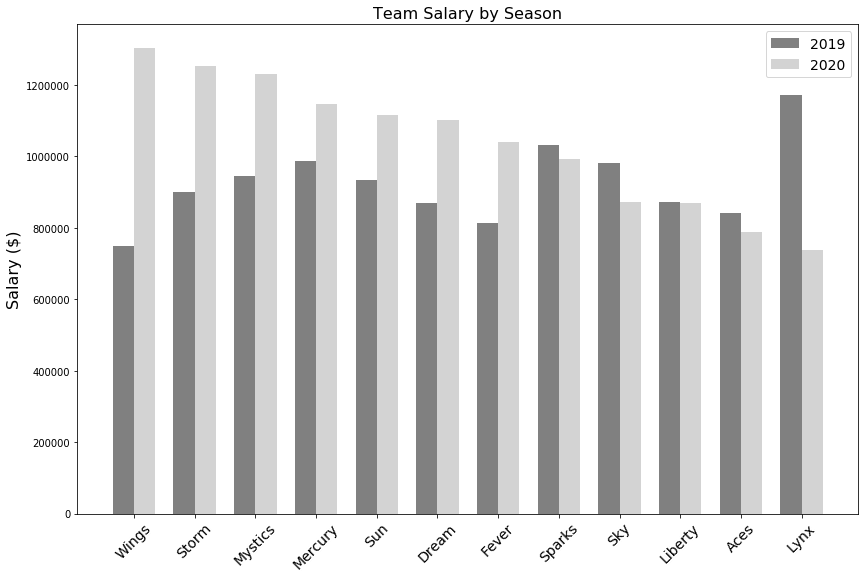

In [9]:
team_viz

Some interesting takeaways from the above figure:
- The Wings have added a tremendous amount of salary this season through extensions and the signing of Megan Gustafson, while the Lynx have shed enough to have the lowest projected payroll to date.
- More than half of the league is exceeding payroll from last year. With a higher salary cap, look for this to extend to even more teams.

## Player Salaries (Current)

In [10]:
team_id = '1611661322'  # Mystics
team_player = team_salaries.team_player_salaries[team_id]

In [11]:
team_player_salary = [team_player[x]['salary'] for x in team_player]
salary_df = pd.DataFrame(team_player_salary)

In [12]:
salary_df.columns = team_salaries.team_player_columns
salary_df['id'] = [x for x in team_player]

In [13]:
salary_df.head()

,Player,Age,Position,YOE,Signed Using,Base Salary,Dead Cap,Cap Figure,Cap %,URL,id
0,Delle Donne,30,F,6,Extension,"$215,000",-,"$215,000",17.46,https://www.spotrac.com/redirect/player/29979/,29979
1,Meesseman,26,F,5,,"$215,000",-,"$215,000",17.46,https://www.spotrac.com/redirect/player/29984/,29984
2,Mitchell,34,G,10,,"$127,000",-,"$127,000",10.31,https://www.spotrac.com/redirect/player/29945/,29945
3,Cloud,27,G,4,,"$117,000",-,"$117,000",9.50,https://www.spotrac.com/redirect/player/29976/,29976
4,Sanders,33,F,6,Extension,"$117,000",-,"$117,000",9.50,https://www.spotrac.com/redirect/player/29989/,29989


With this information, let's create an analogous figure for player salaries.

In [14]:
def compare_player_salary(player_df, team_id):
    """ compare_player_salary plots
    the player salaries from a given team
    """

    player_df['Base Salary'] = [int(x.replace('$', '').replace(',', '')) for x in player_df['Base Salary']]
    player_df = player_df.sort_values('Base Salary', ascending=True)
    season_1_vals = [x for x in player_df['Base Salary']]


    ind = np.arange(len(player_df))  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(14, 9))
    rects1 = ax.barh(ind, season_1_vals, width,
                    color='gray', label='2020')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Player Salary ($)', fontsize=16)
    ax.set_title(ID_TO_TEAM_WNBA[team_id] + ' Player Salaries', fontsize=16)
    ax.set_yticks(ind)

    player_name = [x for x in player_df['Player']]
    ax.set_yticklabels(player_name, fontsize=14)
    ax.legend(fontsize=14, loc='lower right')
    
    plt.close()
    return fig

In [15]:
player_viz = compare_player_salary(salary_df, team_id)

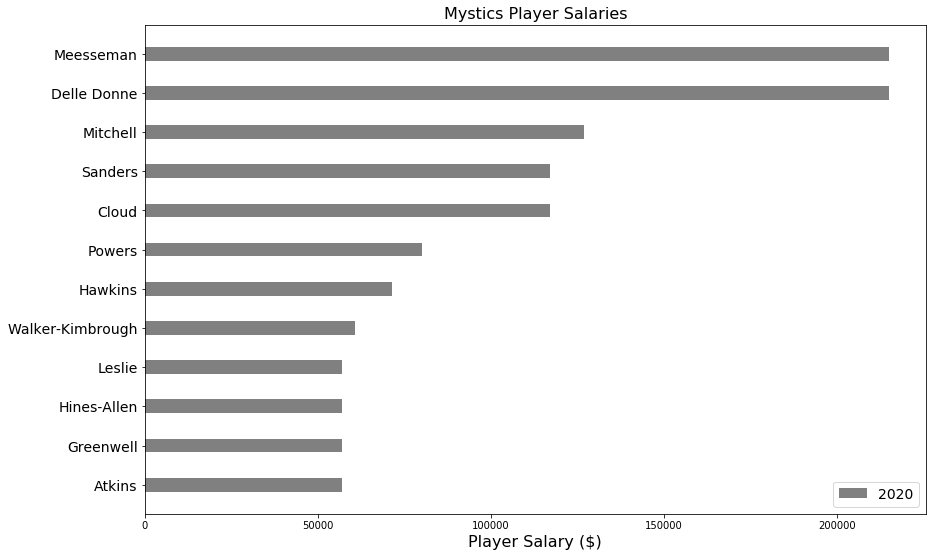

In [16]:
player_viz

- Elena Delle Donne and Emma Meesseman are both leading the team in salary, making \$215,000 next season
- The Mystics have four players on their rookie contracts, each making \$57,000 in 2020.

## Exploration

- Find salary cap information and effectively communicate that in these or other visualizations
- See how adding (or subtracting) a player from a roster would effect a team's salary for the 2020 season.